# Mini Project – Laptop Price Analysis

This project analyzes laptop prices using the laptop_price dataset.
The analysis includes price distribution, company-wise comparison,
operating systems analysis, and relationships between hardware features and price.

In [26]:
!pip install pandas matplotlib


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("laptop_price - dataset (3).csv")

In [28]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [29]:
df.shape

(1275, 15)

In [30]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

## Task 1 – Laptop Prices Distribution

In this task, we plot the prices of all laptops in the dataset.
Each point represents the price of one laptop.
This plot helps us understand the overall price range and variability.

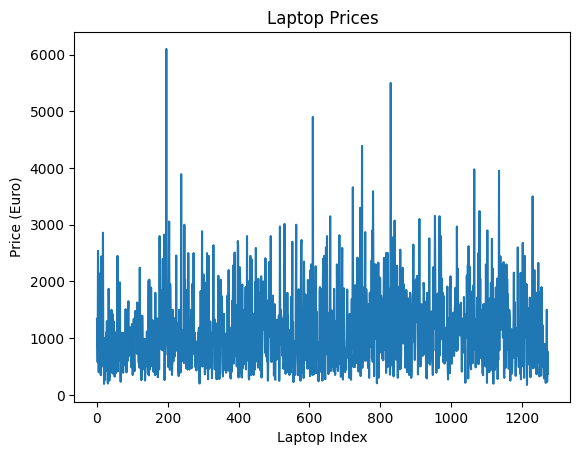

In [31]:
prices = df['Price (Euro)']

plt.plot(prices)
plt.title("Laptop Prices")
plt.xlabel("Laptop Index")
plt.ylabel("Price (Euro)")
plt.show()

## Task 2 – Average Laptop Price by Company

In this task, we calculate the average laptop price for each company.
We then identify which company has the highest average price.

In [32]:
avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean()
avg_price_by_company

Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64

In [33]:
avg_price_by_company.idxmax()
avg_price_by_company.max()

np.float64(3346.1428571428573)

From the results above, **Razer** has the highest average laptop price, 
with an average price of approximately **€3346**.

## Task 3 – Operating Systems
In this task, I examined the OpSys column and identified multiple operating systems written in different formats.
I standardized the operating system names by unifying different versions of Windows and macOS
into single categories, while keeping Linux, Chrome OS, No OS, and Android as separate categories.
This preprocessing step ensures consistency for further analysis.

In [34]:
df['OpSys'].value_counts()

OpSys
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [35]:
df['OpSys_clean'] = df['OpSys']
df.loc[df['OpSys_clean'].str.contains('Windows', na=False), 'OpSys_clean'] = 'Windows'
df.loc[df['OpSys_clean'].str.contains('Mac', na=False), 'OpSys_clean'] = 'macOS'
df['OpSys_clean'].value_counts()

OpSys_clean
Windows      1101
No OS          66
Linux          58
Chrome OS      27
macOS          21
Android         2
Name: count, dtype: int64

## Task 4 – Operating Systems and Price Distributions

After cleaning and unifying the operating system names, I analyzed the price distributions
for each operating system category.  
The histograms show how laptop prices are distributed within each OS group.

Windows laptops show a wide price range with a large concentration in the lower to mid-price range,
while macOS laptops tend to be more expensive on average.
Linux and No OS laptops appear mostly in the lower price ranges, likely targeting budget users

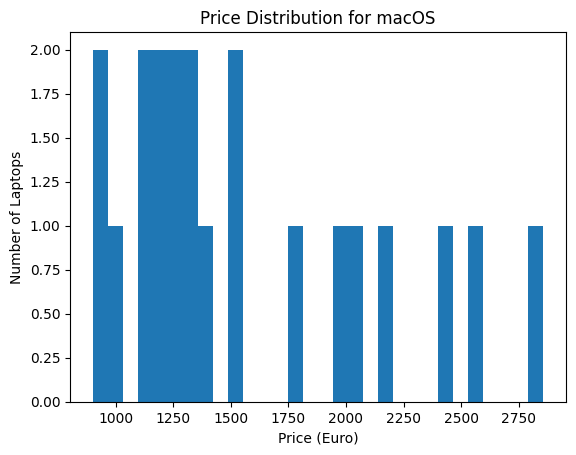

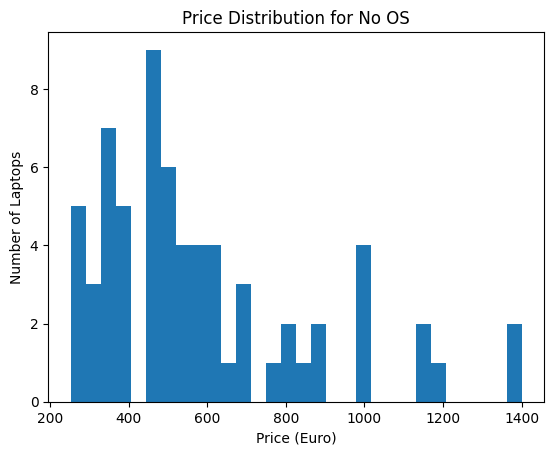

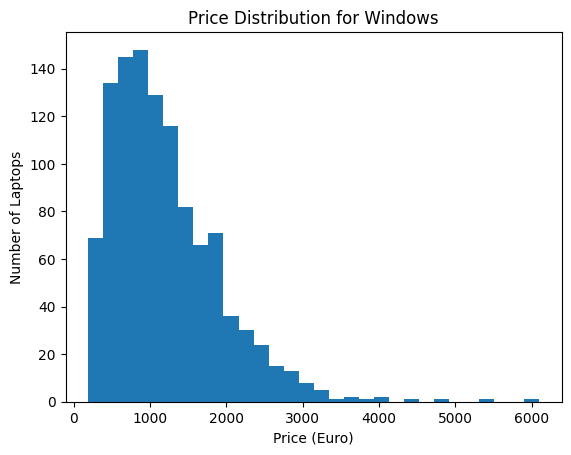

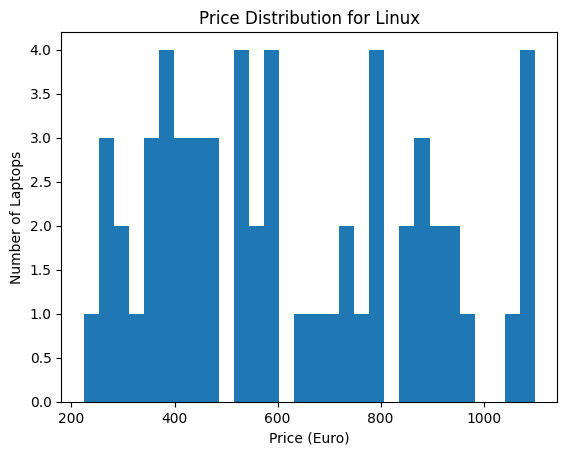

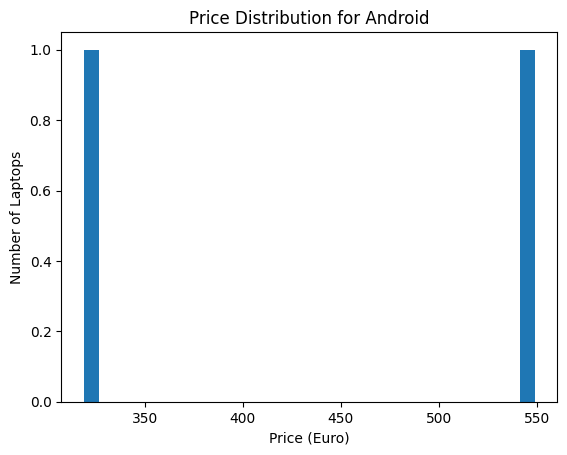

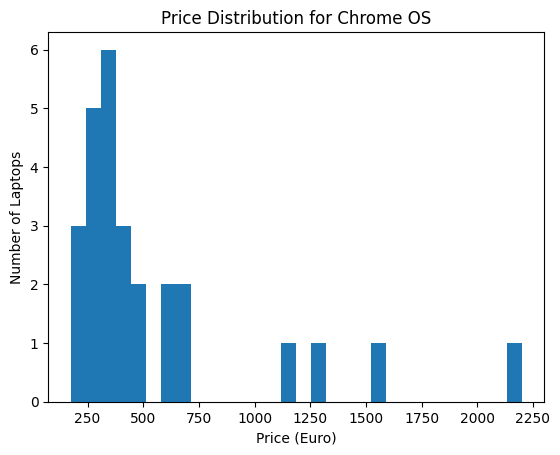

In [36]:
os_types = df['OpSys_clean'].unique()

for os in os_types:
    prices = df[df['OpSys_clean'] == os]['Price (Euro)']

    plt.figure()
    plt.hist(prices, bins=30)
    plt.title(f'Price Distribution for {os}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Number of Laptops')
    plt.show()

## Task 5 – Relationship between RAM and Price

To examine the relationship between RAM and laptop price, I used a scatter plot.
The plot shows a clear positive relationship: laptops with higher RAM tend to be more expensive.

Outliers were detected using the IQR method.
Prices significantly higher or lower than the typical range were considered outliers.
These extreme values may represent premium models or budget devices and can affect the analysis.

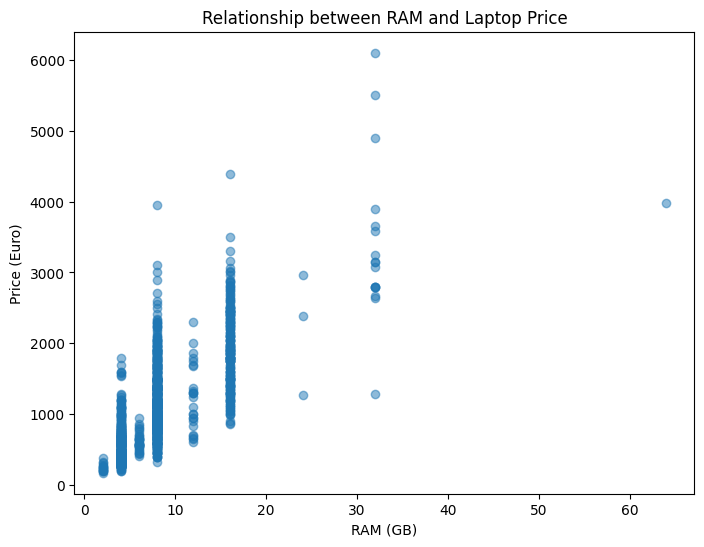

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.5)

plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.title('Relationship between RAM and Laptop Price')

plt.show()

In [38]:
Q1 = df['Price (Euro)'].quantile(0.25)
Q3 = df['Price (Euro)'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['Price (Euro)'] > upper_bound) | (df['Price (Euro)'] < lower_bound)]

outliers.shape

(28, 16)

## Task 5 – RAM and Price Relationship

The scatter plot shows a positive relationship between RAM and laptop price.
As RAM increases, laptop prices generally increase as well, although there is
considerable variation within each RAM category.

To detect outliers in laptop prices, I used the Interquartile Range (IQR) method.
Outliers were defined as prices below Q1 − 1.5×IQR or above Q3 + 1.5×IQR.
Using this method, 28 laptops were identified as price outliers.

## Task 6 – Storage Type Extraction

In this task, I created a new column called **Storage type** by extracting the storage technology
(SSD, HDD, or Flash Storage) from the **Memory** column.

This transformation simplifies further analysis by separating storage capacity from storage technology

In [39]:
def extract_storage_type(memory):
    if 'SSD' in memory:
        return 'SSD'
    elif 'HDD' in memory:
        return 'HDD'
    elif 'Flash' in memory:
        return 'Flash Storage'
    else:
        return 'Other'

df['Storage type'] = df['Memory'].apply(extract_storage_type)

df[['Memory', 'Storage type']].head()

,Memory,Storage type
0,128GB SSD,SSD
1,128GB Flash Storage,Flash Storage
2,256GB SSD,SSD
3,512GB SSD,SSD
4,256GB SSD,SSD
